# Classification with an Academic Success Dataset

# Introduction

This project aims to predict students’ academic outcomes by classifying them into three categories: Graduate, Enroll, or Dropout. Using demographic and academic features, the goal is to build machine learning models that can capture patterns in the data and deliver accurate predictions. The work includes data preprocessing, feature engineering, model training, and evaluation, followed by generating predictions for Kaggle submission.

# Dataset Description

The dataset used in this competition was generated from a deep learning model trained on the original Predict Students' Dropout and Academic Success dataset. While the feature distributions are similar to the original, they are not exactly the same. Participants may also use the original dataset to explore differences or test whether incorporating it improves model performance. For detailed explanations of the features, please refer to the original dataset.

#### Files

- train.csv – training dataset; includes features and the categorical target variable (Target).

- test.csv – test dataset; the goal is to predict the Target class for each row.

- sample_submission.csv – sample file provided in the correct submission format.

# Requirements

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Import Data

In [9]:
train = pd.read_csv("train.csv")

In [10]:
test = pd.read_csv("test.csv")

In [11]:
submission = pd.read_csv("sample_submission.csv")

In [12]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# EDA - Exploratory Data Analysis

In [14]:
train.shape

(76518, 38)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


In [17]:
train.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [18]:
train.tail()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout
76517,76517,1,1,1,9773,1,1,133.1,1,19,...,0,6,6,6,13.666667,0,15.5,2.8,-4.06,Graduate


In [19]:
submission.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


# Data Visualization

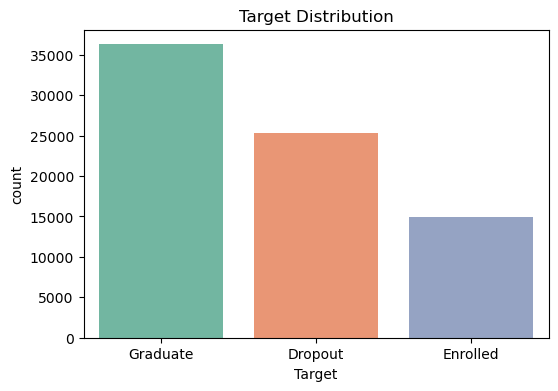

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="Target", data=train, palette="Set2")
plt.title("Target Distribution")
plt.show()

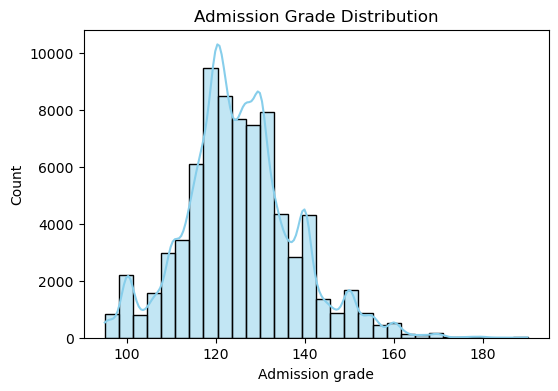

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(train["Admission grade"], bins=30, kde=True, color="skyblue")
plt.title("Admission Grade Distribution")
plt.show()

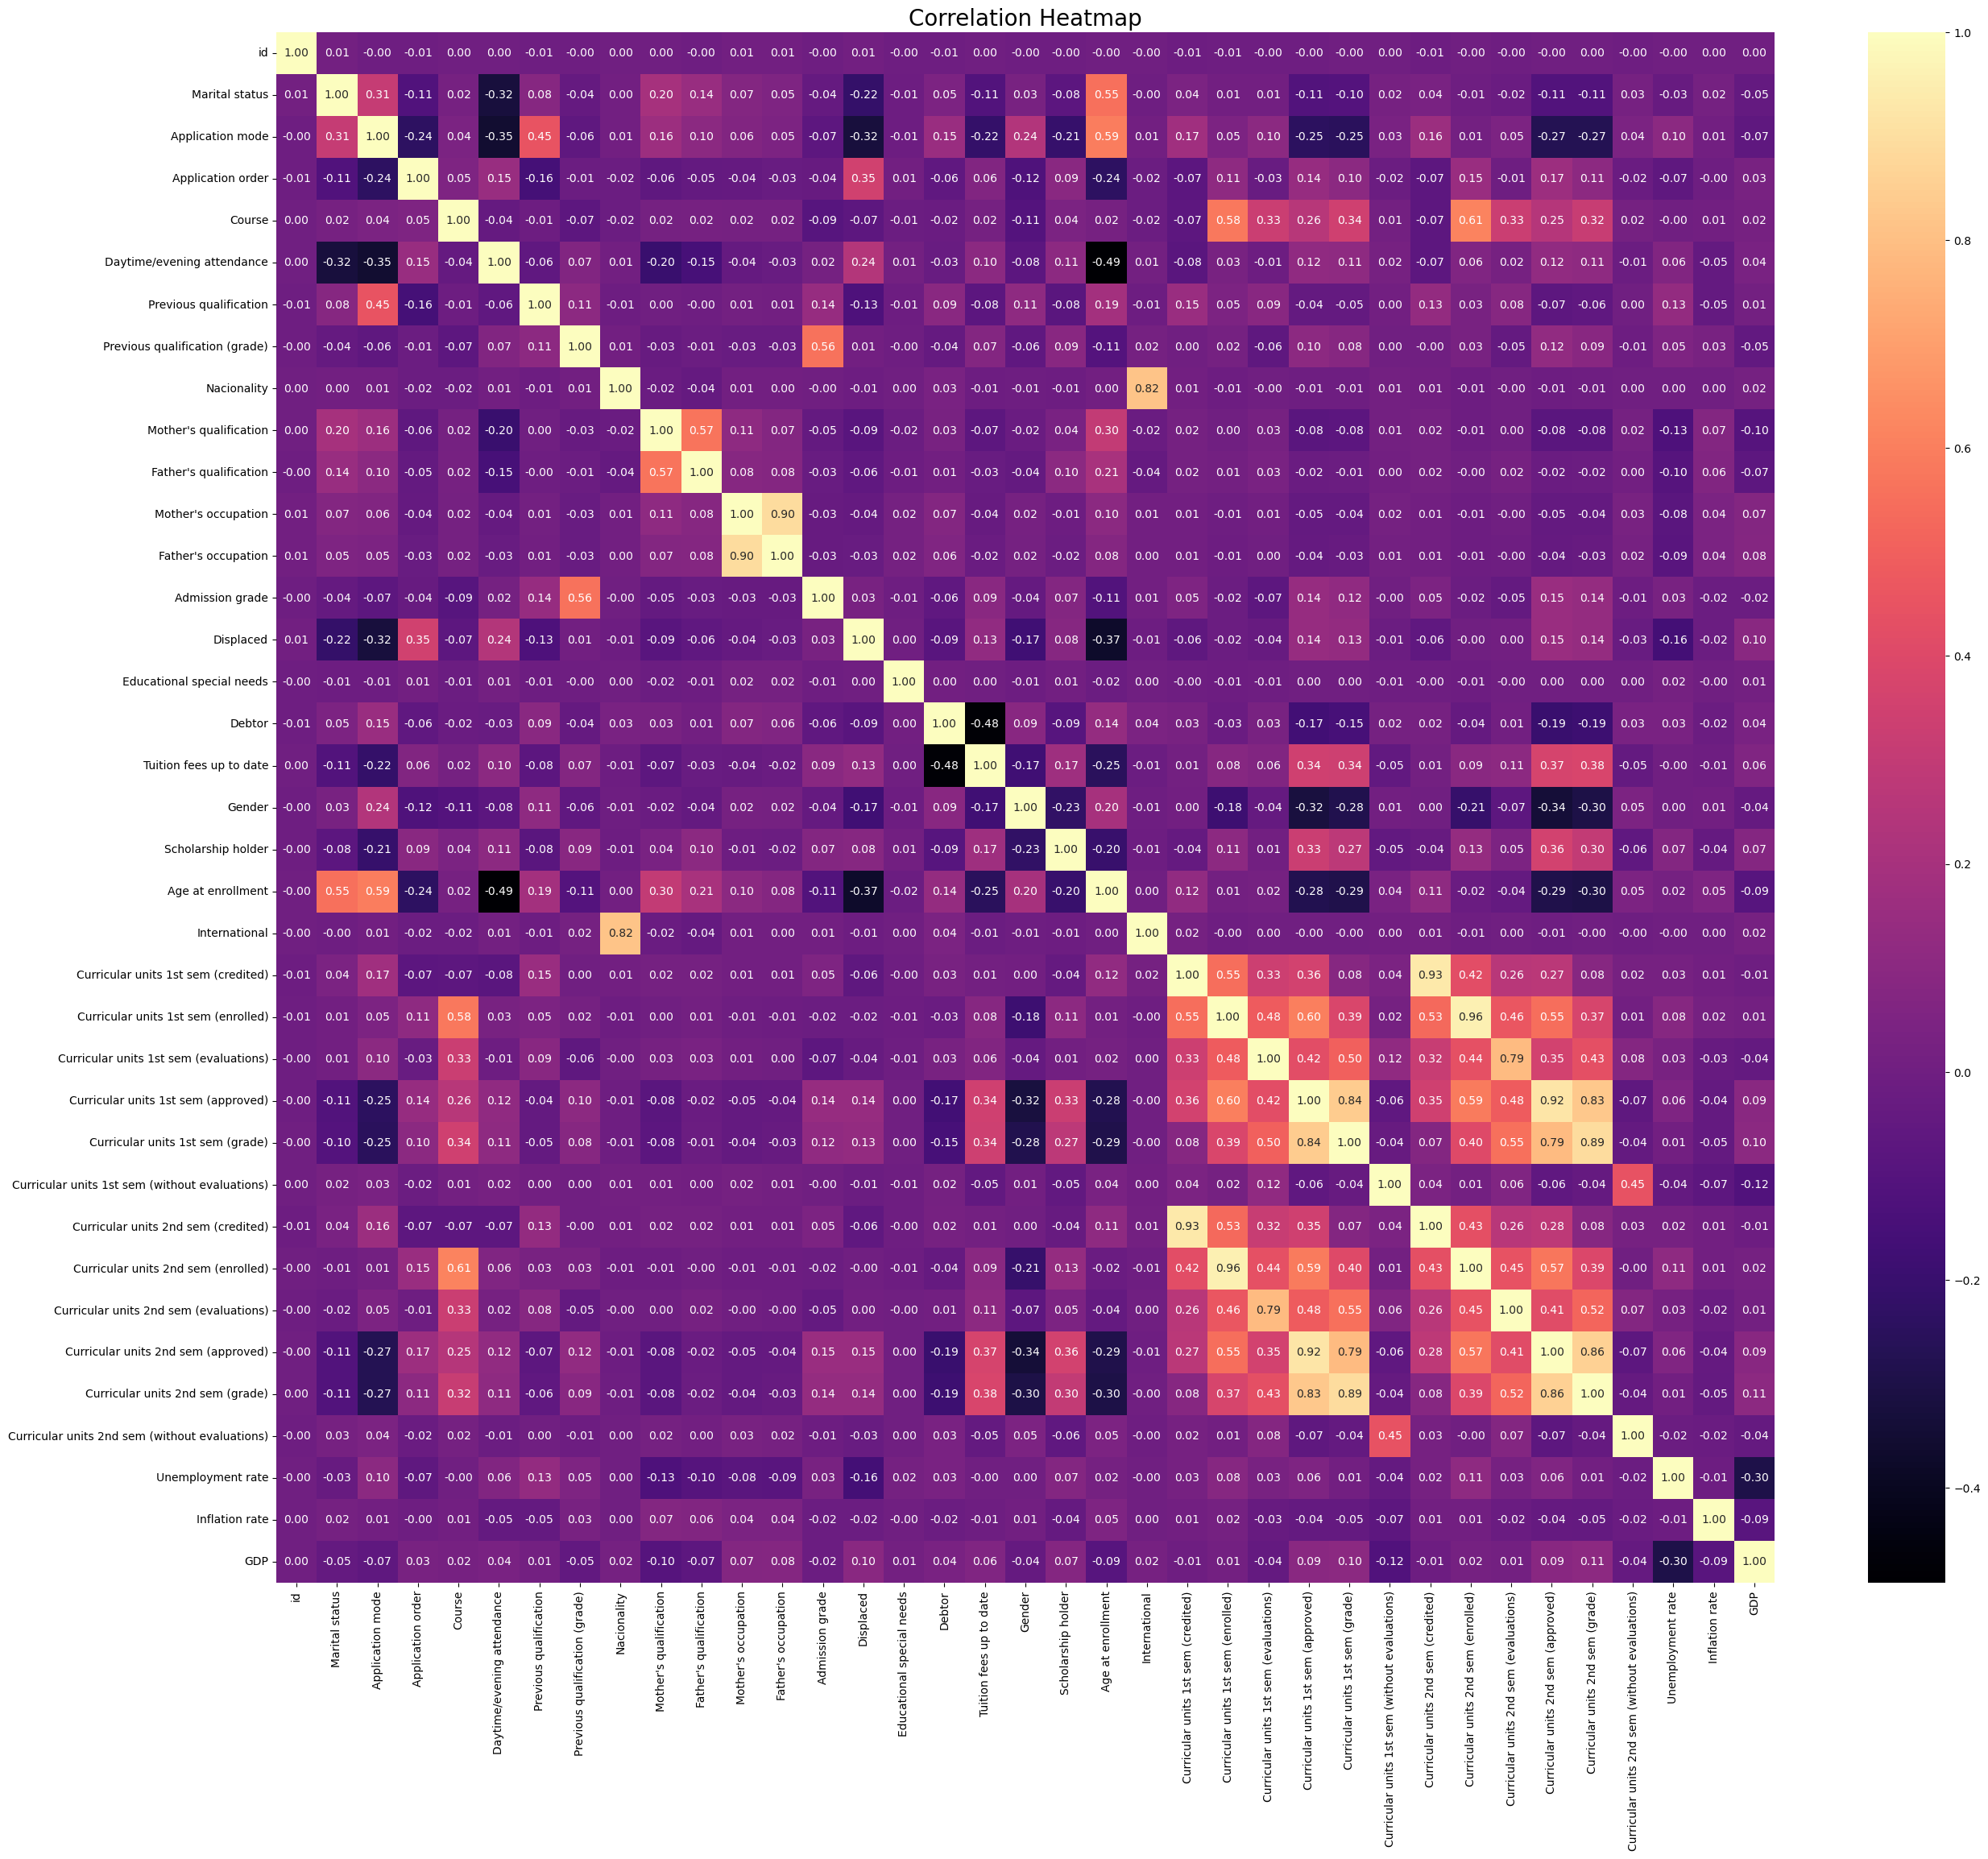

In [23]:
plt.figure(figsize=(30,25))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cmap="magma")
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

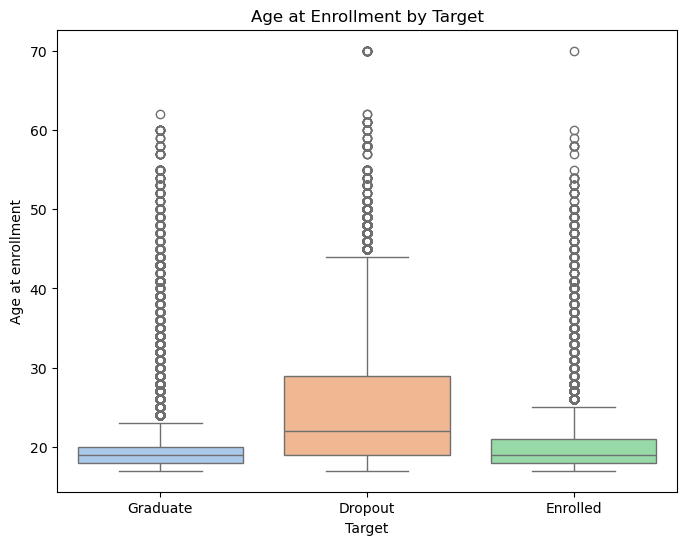

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Target", y="Age at enrollment", data=train, palette="pastel")
plt.title("Age at Enrollment by Target")
plt.show()

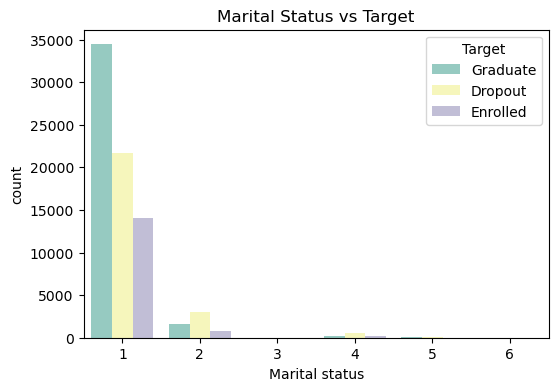

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="Marital status", hue="Target", data=train, palette="Set3")
plt.title("Marital Status vs Target")
plt.show()

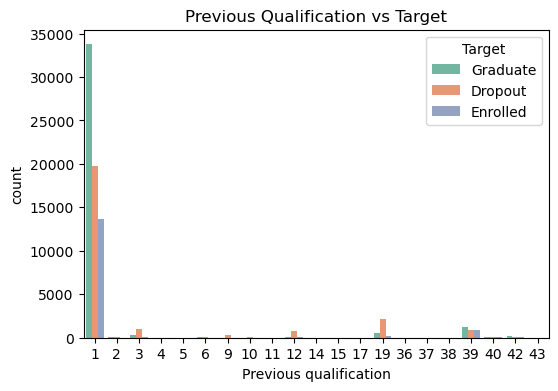

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="Previous qualification", hue="Target", data=train, palette="Set2")
plt.title("Previous Qualification vs Target")
plt.show()

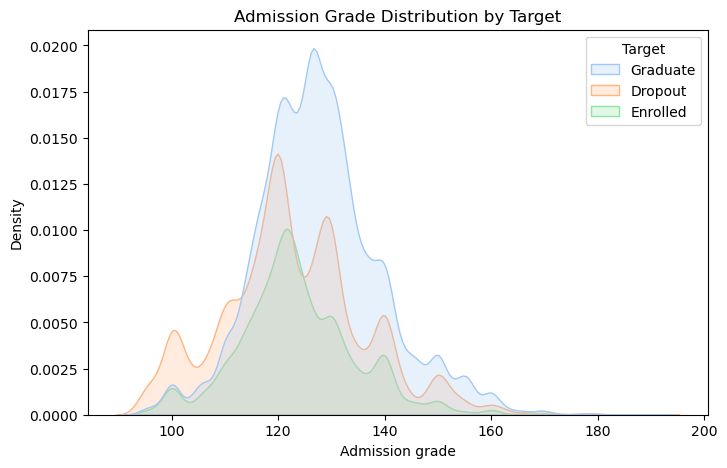

In [27]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=train, x="Admission grade", hue="Target", fill=True, palette="pastel")
plt.title("Admission Grade Distribution by Target")
plt.show()

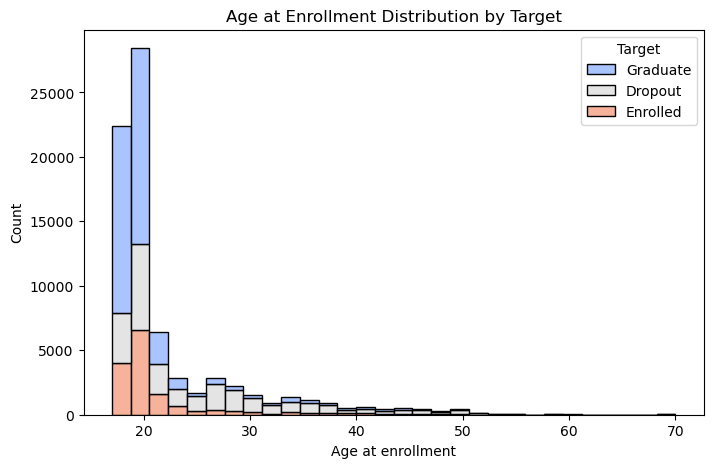

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data=train, x="Age at enrollment", hue="Target", multiple="stack", bins=30, palette="coolwarm")
plt.title("Age at Enrollment Distribution by Target")
plt.show()

# Feature Engineering

num_cols = train.select_dtypes(include=["int64","float64"]).columns.drop("Target", errors="ignore")
cat_cols = train.select_dtypes(include=["object"]).columns.tolist()

le = LabelEncoder()
train["Target_enc"] = le.fit_transform(train["Target"])
y = train["Target_enc"]
X = train.drop(["Target","Target_enc"], axis=1)

# Compare Multiple Classification Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

le = LabelEncoder()
y = le.fit_transform(train["Target"])
X = train.drop("Target", axis=1)

models = {
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

results = pd.DataFrame(columns=["Accuracy"])
for name, model in models.items():
    model.fit(X_train, y_train)
    results.loc[name, "Accuracy"] = accuracy_score(y_test, model.predict(X_test))

results = results.sort_values("Accuracy", ascending=False)
print(results)

                     Accuracy
Gradient Boosting    0.826385
Random Forest        0.826189
Gaussian NB          0.760912
Decision Tree         0.73373
Bernoulli NB         0.702757
Logistic Regression  0.674464
KNN                  0.525026


# Gradient Boosting Test Set Prediction

In [73]:
le = LabelEncoder()

In [75]:
y = le.fit_transform(train["Target"])
X = train.drop("Target", axis=1)

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
gb_model = GradientBoostingClassifier()

In [81]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [82]:
val_preds = gb_model.predict(X_val)

In [83]:
score = accuracy_score(y_val, val_preds)

In [84]:
print("Validation Accuracy:", score)

Validation Accuracy: 0.8263852587558809


In [89]:
submission["Target"] = preds
submission.to_csv("submission.csv", index=False)

In [94]:
import joblib
joblib.dump(gb_model, "gradient_boosting_model.pkl")

['gradient_boosting_model.pkl']

# Conclusion

The Gradient Boosting model achieved a validation accuracy of 82.64%, which was the highest among all the models tested. This indicates that the model can reliably predict student outcomes (Graduate, Enroll, Dropout) based on demographic, academic, and socio-economic features.

Tree-based models like Gradient Boosting and Random Forest outperformed linear models and Naive Bayes classifiers, showing that non-linear relationships in the data are important for accurate predictions.

Overall, this pipeline demonstrates an effective approach to tabular classification problems and can be reused or extended for similar predictive tasks.